# Classification model using Naive Bayes for salary data 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")

In [2]:
print(open("Problem_statement(salary_data).txt").read())

1) Prepare a classification model using Naive Bayes 
for salary data 

Data Description:

age -- age of a person
workclass	-- A work class is a grouping of work 
education	-- Education of an individuals	
maritalstatus -- Marital status of an individulas	
occupation	 -- occupation of an individuals
relationship -- 	
race --  Race of an Individual
sex --  Gender of an Individual
capitalgain --  profit received from the sale of an investment	
capitalloss	-- A decrease in the value of a capital asset
hoursperweek -- number of hours work per week	
native -- Native of an individual
Salary -- salary of an individual



#### Reading train data

In [3]:
train_data = pd.read_csv("SalaryData_Train.csv.crdownload")
train_data

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25454,35,Self-emp-inc,Bachelors,13,Married-civ-spouse,Sales,Own-child,White,Male,5178,0,50,United-States,>50K
25455,45,Private,Bachelors,13,Divorced,Exec-managerial,Unmarried,White,Female,0,0,40,United-States,<=50K
25456,25,Private,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,50,United-States,<=50K
25457,48,Private,Prof-school,15,Divorced,Sales,Not-in-family,White,Male,0,0,13,United-States,<=50K


#### Reading test data 

In [4]:
test_data = pd.read_csv("SalaryData_Test.csv")
test_data

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [5]:
train_data.shape,test_data.shape

((25459, 14), (15060, 14))

In [6]:
train_data.info(),test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25459 entries, 0 to 25458
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            25459 non-null  int64 
 1   workclass      25459 non-null  object
 2   education      25459 non-null  object
 3   educationno    25459 non-null  int64 
 4   maritalstatus  25459 non-null  object
 5   occupation     25459 non-null  object
 6   relationship   25459 non-null  object
 7   race           25459 non-null  object
 8   sex            25459 non-null  object
 9   capitalgain    25459 non-null  int64 
 10  capitalloss    25459 non-null  int64 
 11  hoursperweek   25459 non-null  int64 
 12  native         25459 non-null  object
 13  Salary         25459 non-null  object
dtypes: int64(5), object(9)
memory usage: 2.7+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
-

(None, None)

In [7]:
train_data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,25459.0,38.476492,13.168817,17.0,28.0,37.0,47.0,90.0
educationno,25459.0,10.125535,2.544573,1.0,9.0,10.0,13.0,16.0
capitalgain,25459.0,1105.558074,7532.734446,0.0,0.0,0.0,0.0,99999.0
capitalloss,25459.0,87.900821,403.539322,0.0,0.0,0.0,0.0,4356.0
hoursperweek,25459.0,40.897836,11.934875,1.0,40.0,40.0,45.0,99.0


In [8]:
test_data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,15060.0,38.768327,13.380676,17.0,28.0,37.0,48.0,90.0
educationno,15060.0,10.112749,2.558727,1.0,9.0,10.0,13.0,16.0
capitalgain,15060.0,1120.301594,7703.181842,0.0,0.0,0.0,0.0,99999.0
capitalloss,15060.0,89.041899,406.283245,0.0,0.0,0.0,0.0,3770.0
hoursperweek,15060.0,40.951594,12.062831,1.0,40.0,40.0,45.0,99.0


In [9]:
train_data.columns

Index(['age', 'workclass', 'education', 'educationno', 'maritalstatus',
       'occupation', 'relationship', 'race', 'sex', 'capitalgain',
       'capitalloss', 'hoursperweek', 'native', 'Salary'],
      dtype='object')

In [10]:
train_data.dtypes

age               int64
workclass        object
education        object
educationno       int64
maritalstatus    object
occupation       object
relationship     object
race             object
sex              object
capitalgain       int64
capitalloss       int64
hoursperweek      int64
native           object
Salary           object
dtype: object

In [11]:
train_data["maritalstatus"].dtype

dtype('O')

#### Catagorical columns

In [12]:
[var for var in train_data.columns if train_data[var].dtype=='O']

['workclass',
 'education',
 'maritalstatus',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native',
 'Salary']

In [13]:
for var in [var for var in train_data.columns if train_data[var].dtype=='O']:
    print(var, ' contains ', len(train_data[var].unique()), ' labels')

workclass  contains  7  labels
education  contains  16  labels
maritalstatus  contains  7  labels
occupation  contains  14  labels
relationship  contains  6  labels
race  contains  5  labels
sex  contains  2  labels
native  contains  40  labels
Salary  contains  2  labels


### One hot encoding for train data

In [14]:
from category_encoders import OneHotEncoder

In [15]:
Train_data = OneHotEncoder(cols= ['workclass',
 'education',
 'maritalstatus',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native']).fit_transform(train_data)


In [16]:
Train_data

,age,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,workclass_7,education_1,education_2,...,native_32,native_33,native_34,native_35,native_36,native_37,native_38,native_39,native_40,Salary
0,39,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,<=50K
1,50,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,<=50K
2,38,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,<=50K
3,53,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,<=50K
4,28,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25454,35,0,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,>50K
25455,45,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,<=50K
25456,25,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,<=50K
25457,48,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,<=50K


### One hot encoding for test data

In [17]:
Test_data = OneHotEncoder(cols= ['workclass',
 'education',
 'maritalstatus',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native']).fit_transform(test_data)

In [18]:
Test_data

,age,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,workclass_7,education_1,education_2,...,native_32,native_33,native_34,native_35,native_36,native_37,native_38,native_39,native_40,Salary
0,25,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,<=50K
1,38,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,<=50K
2,28,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,>50K
3,44,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,>50K
4,34,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,<=50K
15056,39,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,<=50K
15057,38,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,<=50K
15058,44,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,<=50K


### Normalizing the train data using Robustscaler method

In [19]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

x_Train = scaler.fit_transform(Train_data.iloc[:,:-1])

In [20]:
y_train = Train_data.iloc[:,-1]

### Normalizing the test data using Robustscaler method

In [21]:
x_test = scaler.fit_transform(Test_data.iloc[:,:-1])
y_test = Test_data.iloc[:,-1]

In [22]:
x_train = pd.DataFrame(x_Train, columns = Train_data.iloc[:,:-1].columns)
x_train

,age,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,workclass_7,education_1,education_2,...,native_31,native_32,native_33,native_34,native_35,native_36,native_37,native_38,native_39,native_40
0,0.105263,1.0,0.0,-1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.684211,0.0,1.0,-1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.052632,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.842105,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.473684,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25454,-0.105263,0.0,0.0,-1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25455,0.421053,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25456,-0.631579,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25457,0.578947,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [23]:
y_train

0         <=50K
1         <=50K
2         <=50K
3         <=50K
4         <=50K
          ...  
25454      >50K
25455     <=50K
25456     <=50K
25457     <=50K
25458     <=50K
Name: Salary, Length: 25459, dtype: object

### Training a  model using GaussianNB Naive Bayes classifier on the training data

In [24]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB

In [25]:
gnb = GaussianNB()
# fit the model
gnb.fit(x_train, y_train)

GaussianNB()

In [26]:
y_p = gnb.predict(x_train)

y_p

array([' <=50K', ' >50K', ' <=50K', ..., ' >50K', ' <=50K', ' <=50K'],
      dtype='<U6')

In [27]:
from sklearn.metrics import accuracy_score

accuracy_score(y_train, y_p)

0.8003456537963

80 % Accuracy training data

In [28]:
y_pred = gnb.predict(x_test)

y_pred

array([' <=50K', ' >50K', ' <=50K', ..., ' <=50K', ' >50K', ' >50K'],
      dtype='<U6')

In [29]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.7296148738379814

73 % Accuracy testing data

In [30]:
from sklearn.metrics import confusion_matrix

#### Confusion Matrix

<AxesSubplot:>

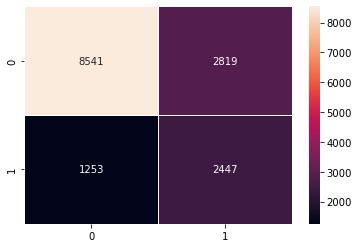

In [31]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot= True, fmt= 'd', linewidth= 1 )

#### Classification Report

In [32]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       <=50K       0.87      0.75      0.81     11360
        >50K       0.46      0.66      0.55      3700

    accuracy                           0.73     15060
   macro avg       0.67      0.71      0.68     15060
weighted avg       0.77      0.73      0.74     15060



### Training a  model using BernoulliNB Naive Bayes classifier on the training data

In [33]:
model2 = BernoulliNB().fit(x_train,y_train)
model2

BernoulliNB()

In [34]:
y_p = model2.predict(x_train)
y_p

array([' <=50K', ' >50K', ' <=50K', ..., ' >50K', ' <=50K', ' <=50K'],
      dtype='<U6')

In [35]:
from sklearn.metrics import accuracy_score

accuracy_score(y_train, y_p)

0.7940610393181193

79.4 % Accuracy training data

In [36]:
y_pred = model2.predict(x_test)
y_pred

array([' <=50K', ' >50K', ' <=50K', ..., ' >50K', ' <=50K', ' >50K'],
      dtype='<U6')

In [37]:
accuracy_score(y_test, y_pred)

0.7389774236387783

73.89 % Accuracy testing data

#### Confusion Matrix

<AxesSubplot:>

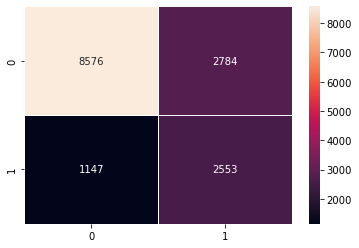

In [38]:
sns.heatmap( confusion_matrix(y_test, y_pred), annot= True, fmt= 'd', linewidth= 1 )

#### Classification Report

In [39]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       <=50K       0.88      0.75      0.81     11360
        >50K       0.48      0.69      0.57      3700

    accuracy                           0.74     15060
   macro avg       0.68      0.72      0.69     15060
weighted avg       0.78      0.74      0.75     15060



#### Normalizing the train data using Normalizer method 

In [40]:
from sklearn.preprocessing import Normalizer

In [41]:
scaler = Normalizer()
x_Train = scaler.fit_transform(Train_data.iloc[:,:-1])

In [42]:
y_train = Train_data.iloc[:,-1]

#### Normalizing the test data using Normalizer method 

In [43]:
x_test = scaler.fit_transform(Test_data.iloc[:,:-1])
y_test = Test_data.iloc[:,-1]

In [44]:
x_train = pd.DataFrame(x_Train, columns = Train_data.iloc[:,:-1].columns)
x_train

,age,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,workclass_7,education_1,education_2,...,native_31,native_32,native_33,native_34,native_35,native_36,native_37,native_38,native_39,native_40
0,0.017933,0.00046,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000460,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.937244,0.00000,0.018745,0.000000,0.0,0.0,0.000000,0.0,0.018745,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.678896,0.00000,0.000000,0.017866,0.0,0.0,0.000000,0.0,0.000000,0.017866,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.793079,0.00000,0.000000,0.014964,0.0,0.0,0.000000,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.553291,0.00000,0.000000,0.019760,0.0,0.0,0.000000,0.0,0.019760,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25454,0.006759,0.00000,0.000000,0.000000,0.0,0.0,0.000193,0.0,0.000193,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25455,0.729804,0.00000,0.000000,0.016218,0.0,0.0,0.000000,0.0,0.016218,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25456,0.439680,0.00000,0.000000,0.017587,0.0,0.0,0.000000,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25457,0.922736,0.00000,0.000000,0.019224,0.0,0.0,0.000000,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Training a  model using MultinomialNB Naive Bayes classifier on the training data 

In [45]:
model3 = MultinomialNB().fit(x_train,y_train)
model3

MultinomialNB()

In [46]:
y_p = model2.predict(x_train)
y_p

array([' >50K', ' >50K', ' <=50K', ..., ' >50K', ' >50K', ' <=50K'],
      dtype='<U6')

In [47]:
accuracy_score(y_train, y_p)

0.6450371185042617

64 % Accuracy training data

In [48]:
accuracy_score(y_test, y_pred)

0.7389774236387783

73 % Accuracy training data

#### Confusion Matrix

<AxesSubplot:>

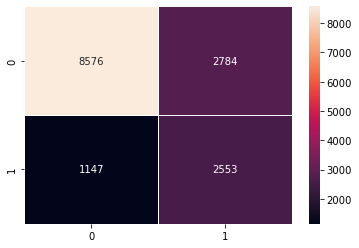

In [49]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot= True, fmt= 'd', linewidth= 1 )

#### Classification Report

In [50]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       <=50K       0.88      0.75      0.81     11360
        >50K       0.48      0.69      0.57      3700

    accuracy                           0.74     15060
   macro avg       0.68      0.72      0.69     15060
weighted avg       0.78      0.74      0.75     15060



Comparing all the 3 Naive Bayes classifiers, GaussianNB is performing Best